In [ ]:
## Export growth distribution by RCA and Xc value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import binet as bt
%matplotlib inline

In [4]:
#Read data
df = pd.read_csv('fit_data_exports.csv')
df = df.replace(-np.inf, np.nan).dropna()

#Define quantile categories
df['log_RCA_cat'] = (.75*df['log_RCA'].rank(pct = True)).round(2)
df["log_xcp_cat"] = (.75*df["log_xcp"].rank(pct = True)).round(2)
df['T_cat'] = (.75*df.groupby("log_RCA_cat")["T"].rank(pct = True)).round(2)


df = df[['ccode','pcode','log_RCA','log_xcp','T','RCA_bin_end','log_RCA_cat','log_xcp_cat','T_cat','ex_growth']]

In [122]:
#Table of chances for fixed RCA

# prob_data = df.groupby(['log_RCA_cat','T_cat']).mean().reset_index()[['log_RCA_cat','T_cat','RCA_bin_end']]
# x = df[[u'ccode', u'pcode', u'log_RCA', u'log_xcp', u'T', u'log_RCA_cat', u'log_xcp_cat', u'T_cat', u'ex_growth']].merge(prob_data)
# x.loc[abs(x.log_RCA - np.log10(.5)) < 0.01].groupby('ccode').mean().sort_values(by = 'RCA_bin_end')


In [115]:
#Table of exports

# dg = pd.read_csv('fit_data_exports.csv')
# dg = dg.loc[(dg.ccode == 'arg') & (dg.year == 2010)][['ccode','pcode','year','log_xcp']].merge(pr)

# dg['log_xcp'] = np.power(10,dg['log_xcp'])
# dg.sample(50).sort_values(by = 'log_xcp')

In [116]:
#Table of country's products by advantage

# pr = pd.read_csv('pr.csv')
# pr

# x.loc[x.ccode == 'ita'].groupby('pcode').mean().reset_index().merge(pr).sort_values(by = 'RCA_bin_end', ascending = False)

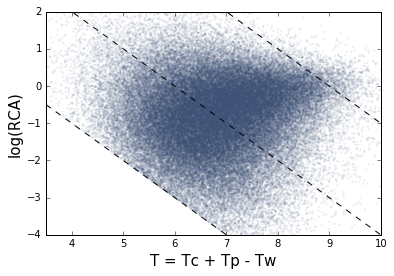

In [162]:
# df[['X','log_RCA','RCA_bin_end']].to_csv('numericalRCA_HiRes.csv', index = False)
x = df.groupby(['log_RCA_cat','T_cat']).count().reset_index().iloc[:,:3]
x2 = df.groupby(['log_RCA_cat','T_cat']).mean().reset_index()[['log_RCA_cat','T_cat','T','log_RCA']]

#ccode is just the count col11111umn
x = x2.merge(x)[['T','log_RCA','ccode']]
x = x.rename(columns = {'ccode': 'counts'})
# x.to_csv('XlogRCAplane_counts.csv', index = False)

T = np.arange(3.5,11,.5)
pts = df.sample(100000)

# ita = df.loc[df.ccode == 'chn']
# plt.scatter(ita['T'], ita.log_RCA, c = 'None', alpha = 1, edgecolor = 'k')

plt.scatter(pts['T'], pts.log_RCA, marker = '.', c = '#3f5378', alpha = 0.1,edgecolor = 'None')

plt.plot(T,3 - T, 'k--')
plt.plot(T,6 - T, 'k--')
plt.plot(T,9 - T, 'k--')
plt.xlabel('T = Tc + Tp - Tw',fontsize = 15)
plt.ylabel('log(RCA)',fontsize = 15)
plt.xlim(3.5,10)
plt.ylim(-4,2)
plt.show()

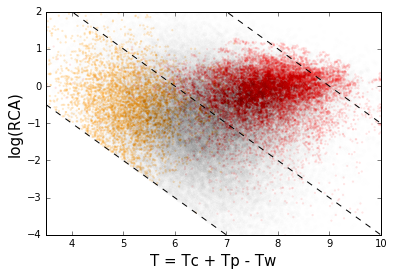

In [165]:

ita = df.loc[df.ccode == 'ita']
ando = df.loc[df.ccode == 'and']
plt.scatter(ita['T'], ita.log_RCA, marker = '.', c = 'r', alpha = .1, edgecolor = 'None')
plt.scatter(ando['T'], ando.log_RCA, marker = '.', c = '#ff9800', alpha = .2, edgecolor = 'None')

plt.scatter(pts['T'], pts.log_RCA, c = 'k', alpha = 0.002, edgecolor = 'None')
plt.plot(T,3 - T, 'k--')
plt.plot(T,6 - T, 'k--')
plt.plot(T,9 - T, 'k--')
plt.xlabel('T = Tc + Tp - Tw',fontsize = 15)
plt.ylabel('log(RCA)',fontsize = 15)
plt.xlim(3.5,10)
plt.ylim(-4,2)
plt.savefig('ita_and.png', transparent=True)
plt.show()

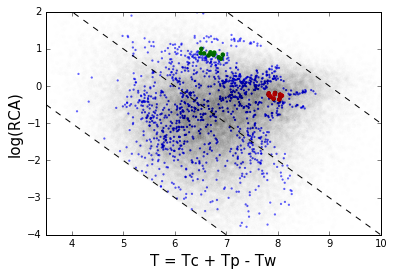

In [246]:
T = np.arange(3.5,11,.5)

fruits = df.loc[df.pcode == 811]
plt.scatter(fruits['T'], fruits.log_RCA, marker = '.', c = 'b', alpha = .6, edgecolor = 'None')
# oil = df.loc[df.pcode == 2709]
# plt.scatter(oil['T'], oil.log_RCA, marker = '.', c = 'purple', alpha = .6, edgecolor = 'None')

ita_fruits = df.loc[df.pcode == 811].loc[df.ccode == 'ita']
plt.scatter(ita_fruits['T'], ita_fruits.log_RCA, c = 'r', alpha = 1, edgecolor = 'None')
grc_fruits = df.loc[df.pcode == 811].loc[df.ccode == 'grc']
plt.scatter(grc_fruits['T'], grc_fruits.log_RCA, c = 'g', alpha = 1, edgecolor = 'None')
# mar_fruits = df.loc[df.pcode == 811].loc[df.ccode == 'mar']
# plt.scatter(mar_fruits['T'], mar_fruits.log_RCA, c = 'g', alpha = 1, edgecolor = 'None')

plt.scatter(pts['T'], pts.log_RCA, c = 'k', alpha = 0.002, edgecolor = 'None')
plt.plot(T,3 - T, 'k--')
plt.plot(T,6 - T, 'k--')
plt.plot(T,9 - T, 'k--')
plt.xlabel('T = Tc + Tp - Tw',fontsize = 15)
plt.ylabel('log(RCA)',fontsize = 15)
plt.xlim(3.5,10)
plt.ylim(-4,2)
plt.savefig('ita_and.png', transparent=True)
plt.show()

In [243]:
# fruits.groupby('ccode')['log_xcp'].mean().sort_values()
fruits.loc[fruits.ccode == 'grc']
# fruits.loc[fruits.ccode == 'mar']

,ccode,pcode,log_RCA,log_xcp,T,RCA_bin_end,log_RCA_cat,log_xcp_cat,T_cat,ex_growth
11537,mar,811,1.297123,7.685043,6.387920,1,0.74,0.64,0.45,0.048708
209333,mar,811,1.346067,7.733751,6.387684,1,0.74,0.65,0.45,-0.142467
407201,mar,811,1.150667,7.591284,6.440617,1,0.74,0.63,0.47,0.106060
606241,mar,811,1.200575,7.697344,6.496768,1,0.74,0.64,0.48,0.258351
805281,mar,811,1.336346,7.955695,6.619348,1,0.74,0.67,0.52,0.085330
1004321,mar,811,1.337617,8.041025,6.703407,1,0.74,0.68,0.54,-0.187683
1203201,mar,811,1.285296,7.853342,6.568046,1,0.74,0.66,0.50,-0.041167
1402081,mar,811,1.194843,7.812174,6.617331,1,0.74,0.66,0.52,0.158287
1600961,mar,811,1.308997,7.970462,6.661465,1,0.74,0.67,0.53,0.063929
1799841,mar,811,1.265833,8.034391,6.768558,1,0.74,0.68,0.56,0.043246


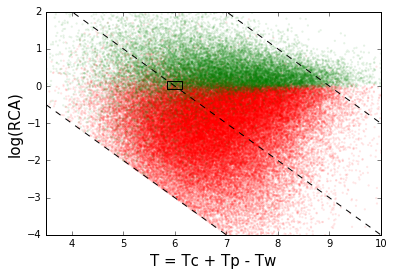

In [183]:
T = np.arange(3.5,11,.5)
pts = df.sample(100000)

pts0 = pts.loc[pts.RCA_bin_end == 0]
pts1 = pts.loc[pts.RCA_bin_end == 1]

from matplotlib.patches import Rectangle
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((6 - .15, 0.03 - .1), .3, .2, facecolor="None"))

plt.scatter(pts0['T'], pts0.log_RCA, marker = '.', c = 'r', alpha = 0.1,edgecolor = 'None')
plt.scatter(pts1['T'], pts1.log_RCA, marker = '.', c = 'g', alpha = 0.1,edgecolor = 'None')

plt.plot(T,3 - T, 'k--')
plt.plot(T,6 - T, 'k--')
plt.plot(T,9 - T, 'k--')
plt.xlabel('T = Tc + Tp - Tw',fontsize = 15)
plt.ylabel('log(RCA)',fontsize = 15)


plt.xlim(3.5,10)
plt.ylim(-4,2)
plt.show()

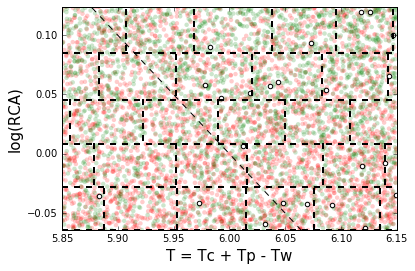

In [193]:
T = np.arange(3.5,11,.5)
x = df.loc[(df['T'] > 5.85) & (df['T'] < 6.15) &(df.log_RCA > -0.1)&(df.log_RCA < 0.15)]
pts0 = x.loc[x.RCA_bin_end == 0]
pts1 = x.loc[x.RCA_bin_end == 1]

plt.figure()

m = df.groupby('log_RCA_cat')['log_RCA'].min().iloc[1:].values
M = df.groupby('log_RCA_cat')['log_RCA'].max().iloc[:-1].values
log_RCA_cat_levels = (m + M)/2.
[plt.axhline(y=l, color='k', linestyle='--',linewidth=2) for l in log_RCA_cat_levels[56:61]]

r = [.57, .58, .59, .6, .61]
for i in range(5):
    xv = df.loc[df.log_RCA_cat == r[i]]
    mv = xv.groupby('T_cat')['T'].min().iloc[1:].values
    Mv = xv.groupby('T_cat')['T'].min().iloc[1:].values
    T_cat_levels = (mv + Mv)/2.
    [plt.axvline(x = T, ymin = .2 * i, ymax = .2 * (i + 1), color='k', linestyle='--',linewidth=2) for T in T_cat_levels]

plt.scatter(pts0['T'], pts0.log_RCA, c = 'r', alpha = .2, edgecolor = 'None')
plt.scatter(pts1['T'], pts1.log_RCA, c = 'g', alpha = .2, edgecolor = 'None')
plt.plot(np.arange(3.5,11,.5),6 - np.arange(3.5,11,.5), 'k--')
plt.xlabel('T = Tc + Tp - Tw',fontsize = 15)
plt.ylabel('log(RCA)',fontsize = 15)
plt.xlim(5.85,6.15)
plt.ylim(log_RCA_cat_levels[56],log_RCA_cat_levels[61])

ita = df.loc[df.ccode == 'ita']
plt.scatter(ita['T'], ita.log_RCA, c = 'w', alpha = 1, edgecolor = 'k')

plt.show()

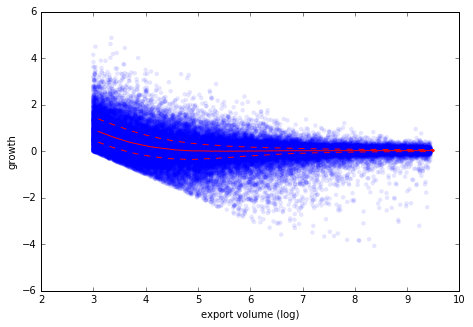

In [4]:
grouped = df.groupby('log_xcp_cat')
x = grouped.mean()['log_xcp']

plt.figure(figsize=(7.5,5))
p75 = grouped.quantile(.75)['ex_growth']
med = grouped.quantile(.5)['ex_growth']
p25 = grouped.quantile(.25)['ex_growth']
plt.plot(x, p75, 'r--')
plt.plot(x, med, 'r-')
plt.plot(x, p25, 'r--')

plt.ylabel('growth')
plt.xlabel('export volume (log)')

df['round_size'] = df['log_xcp'].round(1)
unif_df = df.groupby('round_size').filter(lambda x: len(x) > 1000).groupby('round_size').apply(lambda y: y.sample(1000))
plt.scatter(unif_df['log_xcp'], unif_df['ex_growth'],alpha = .1, edgecolor = 'None')

plt.show()

In [38]:
#Export data of xcp-uniformed growth distribution seen above.

dg = unif_df[['log_xcp','ex_growth']].reset_index()[['round_size','ex_growth']]
dg['ex_growth'] = dg['ex_growth'].round(1)
dg['count'] = 1

Pgx = dg.groupby(['round_size','ex_growth']).count().reset_index()
Pgx.columns = ['xcp','growth','counts']
Pgx.to_csv('Pgx.csv',index = False)
Pgx.sample(5)

,xcp,growth,counts
1967,8.4,0.3,21
1569,6.9,-0.5,11
136,3.3,2.1,12
2132,9.4,0.4,2
1585,6.9,1.1,1


In [42]:
grouped = df.groupby('log_xcp_cat')
x = grouped.mean()['log_xcp']


p10 = grouped.quantile(.05)['ex_growth']
p90 = grouped.quantile(.95)['ex_growth']

xVals = pd.concat([x, p10,p90], axis=1)
xVals.columns = ['log_xcp','perc_10','perc_90']
xVals.to_csv('xVals.csv', index = False)
xVals.sample(5).sort_values(by = 'log_xcp')

,log_xcp,perc_10,perc_90
log_xcp_cat,,,
0.02,3.694208,-0.536601,1.765817
0.12,5.152003,-1.182090,0.843727
0.14,5.365692,-1.143496,0.761967
0.18,5.784054,-1.050477,0.617538
0.23,6.303417,-0.841335,0.480307


In [45]:
xc_groups = np.sort(df.log_xcp_cat.unique())
# gr = 0.05
for i in range(len(xc_groups)):
    
    #Cut out tails, as they do not contribute to the integral and worsen the fit unnecesarily.
    dg = grouped.get_group(xc_groups[i])
    dg['ex_growth_pct'] = dg['ex_growth'].rank(pct = True)
    hist = plt.hist(dg.loc[(dg['ex_growth_pct']>0.05) & (dg['ex_growth_pct']<0.95)][['ex_growth']].values, bins = 40, normed = True)

#     hist = plt.hist(grouped.get_group(xc_groups[i])['ex_growth'], bins = 40, normed = True)
    prob = np.log((hist[0] + .00000001) / hist[0].sum())
    grow = .5*(hist[1][:-1] + hist[1][1:])
    dg = pd.DataFrame(grow, prob).reset_index()
    dg.columns = ['LogProb', 'Growth']
    dg = dg.reindex(columns = ['Growth', 'LogProb'])
    dg.to_csv('probGrowth_fit_data'+str(i)+'.csv', index = False)
    plt.clf()

/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


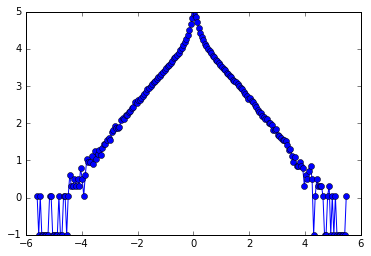

In [49]:
#Aggregate growth distribution
hist = plt.hist(df['ex_growth'], bins = 200, edgecolor = 'None')
plt.clf()
vals = hist[0] + .1
bins = .5*(hist[1][:-1] + hist[1][1:])
plt.plot(bins, np.log10(vals), 'o-')
# plt.xlim(-3,2)
plt.show()

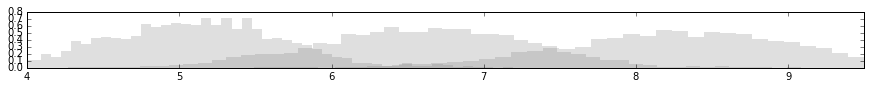

In [195]:
#T distribution for given country(s)
plt.figure(figsize=(15,1))
plt.hist(df.loc[df.ccode == 'and']['T'], 70, color = 'gray', edgecolor = 'None', alpha = 0.25, normed = True)
plt.hist(df.loc[df.ccode == 'tun']['T'], 70, color = 'gray', edgecolor = 'None', alpha = 0.25, normed = True)
plt.hist(df.loc[df.ccode == 'deu']['T'], 70, color = 'gray', edgecolor = 'None', alpha = 0.25, normed = True)
plt.xlim(4, 9.5)
plt.xlim()
plt.show()

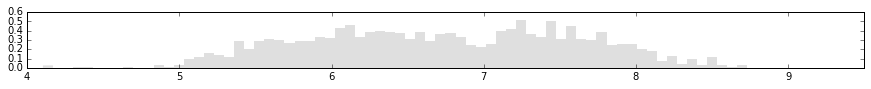

In [215]:
p_small = np.array(df.groupby('pcode')['T_cat'].mean().sort_values().index)[:10]
p_med = np.array(df.groupby('pcode')['T_cat'].mean().sort_values().index)[610:630]
p_large = np.array(df.groupby('pcode')['T_cat'].mean().sort_values().index)[-10:]

pr = pd.read_csv('pr.csv')
pr.loc[pr.pcode.isin(p_med)]

plt.figure(figsize=(15,1))
#Crude Oil
# plt.hist(df.loc[df.pcode == 2709]['T'], 70, color = 'gray', edgecolor = 'None', alpha = 0.25, normed = True)
# #Natural Sponges
# plt.hist(df.loc[df.pcode == 509]['T'], 70, color = 'gray', edgecolor = 'None', alpha = 0.25, normed = True)
#Fruit and nuts
plt.hist(df.loc[df.pcode == 811]['T'], 70, color = 'gray', edgecolor = 'None', alpha = 0.25, normed = True)
plt.xlim(4, 9.5)
plt.xlim()
plt.show()

In [82]:
#T distribution for given product(s)
plt.figure(figsize=(15,1))
plt.hist(df.loc[df.ccode == 'and']['T'], 70, color = 'gray', edgecolor = 'None', alpha = 0.25, normed = True)
plt.hist(df.loc[df.ccode == 'tun']['T'], 70, color = 'gray', edgecolor = 'None', alpha = 0.25, normed = True)
plt.hist(df.loc[df.ccode == 'deu']['T'], 70, color = 'gray', edgecolor = 'None', alpha = 0.25, normed = True)
plt.xlim(4, 9.5)
plt.xlim()
plt.show()

ccode
pse    5.353028
rwa    5.367518
mne    5.495693
syc    5.606558
guy    5.793042
mda    5.849930
lbn    5.965395
mng    6.004148
ken    6.029248
bih    6.047924
cmr    6.253111
bol    6.263552
gha    6.387821
yem    6.524249
ltu    6.555609
tun    6.588171
aze    6.767868
blr    6.774777
zaf    7.157758
blx    7.740365
Name: X, dtype: float64

In [ ]:
# #Aggregate growth distribution
# hist = plt.hist(df.loc[df['export_i_pct'] == 0.3]['ex_growth'], bins = 200, edgecolor = 'None')
# plt.clf()
# vals = hist[0] + .1
# bins = .5*(hist[1][:-1] + hist[1][1:])
# plt.plot(bins, np.log10(vals), 'o-')
# plt.xlim(-3,2)
# plt.show()

In [ ]:
#Mean and std of export growth dists as function of export value.

grouped = df.groupby('export_i_pct')
x = grouped.mean()['export_i']

mean = grouped.mean()['ex_growth']
std = grouped.std()['ex_growth']
skew = grouped.skew()['ex_growth']*0.1
kurtosis = grouped.apply(pd.DataFrame.kurt)['ex_growth']*0.005
plt.plot(x, mean, 'o-', label = 'mean')
plt.plot(x, std, 'o-', label = 'std')
plt.plot(x, skew, 'o-', label = 'skew')
plt.plot(x, kurtosis, 'o-', label = 'kurt')
plt.xscale('log')
# plt.legend()
plt.show()

plt.figure(figsize=(15,10))
p75 = grouped.quantile(.75)['ex_growth']
med = grouped.quantile(.5)['ex_growth']
p25 = grouped.quantile(.25)['ex_growth']
p10 = grouped.quantile(.1)['ex_growth']
p90 = grouped.quantile(.9)['ex_growth']
plt.plot(x, p75, '--')
plt.plot(x, med, '-')
plt.plot(x, p25, '--')
plt.plot(x, p10, '--')
plt.plot(x, p90, '--')
plt.ylabel('export growth (log)')
plt.xlabel('export size (log)')
plt.xscale('log')

d = df.sample(1000)
plt.scatter(d['export_i'], d['ex_growth'],alpha = 0.1, edgecolor = 'None')
plt.show()
# plt.hist(df.loc[np.abs(df.export_i - 10**6) < 10**4]['ex_growth'],100,edgecolor = 'None', alpha = 0.3, normed = True)
# plt.hist(df.loc[np.abs(df.export_i - 10**9) < 10**7]['ex_growth'],100,edgecolor = 'None', alpha = 0.3, normed = True)
# plt.xlim(-6,6)
# plt.show()


In [ ]:
# mean growth:  0.1124995
# mean growth: -0.008583122 (only >10**5)
    
# df.loc[df['export_i'] > 10**5]['ex_growth'].mean()

In [ ]:
# pd.DataFrame([x, p10])
# plt.plot(x, p90, '--')
d = pd.concat([np.log10(x), p10,p90], axis=1)
d.columns = ['export_i','perc_10','perc_90']
d.to_csv('xVals.csv', index = False)

In [ ]:
g = df.groupby('export_i_pct').get_group(0.2)['ex_growth']

hist = plt.hist(g, bins = 100, edgecolor = 'None')
plt.clf()
vals = hist[0] + .1
bins = .5*(hist[1][:-1] + hist[1][1:])
plt.plot(bins, np.log(vals), 'o-')
l1 = np.arange(-1.5,m,.01)
l2 = np.arange(m,3,.01)

m = g.mean()
s = g.std()
plt.plot(l1, (l1-m)/s +6.8, '-')
plt.plot(l2,-(l2-m)/s +6.8, '-')
# plt.xlim(-3,2)
plt.show()

In [ ]:
#log(RCA distribution)

hist = plt.hist(df['log_RCA'], bins = 90, edgecolor = 'None')
plt.clf()
vals = hist[0] + .1
bins = .5*(hist[1][:-1] + hist[1][1:])
plt.plot(bins, np.log(vals), 'o-')
l = np.arange(-5,2,1)
plt.plot(l, -0.3*(l+0.2)**2 +10.6, '-')
# plt.xlim(-3,2)
plt.show()

In [ ]:
df = pd.read_csv('fit_data_exports.csv')
df['log_RCA'] = np.log10(df['RCA']).clip(-5.1)
df = df.loc[(df['export_i'] > 0) & (df['export_f'] > 0)].loc[(df.Xp > 9) & (df.Xp < 9.5)]
df['log_RCA_pct'] = (.2*df['log_RCA'].rank(pct = True)).round(2)
df["Xc_pct"] = (.2*df.groupby("log_RCA_pct")["Xc"].rank(pct = True)).round(2)
# df["Xp_pct"] = (.3*df.groupby("log_RCA_pct")["Xp"].rank(pct = True)).round(2)
df['ex_growth'] = np.log10(df['export_f']) - np.log10(df['export_i'])
df["export_i_pct"] = df["export_i"].rank(pct = True).round(2)

In [ ]:
#Mean and std for growth distributions, depending on RCA and Xc values:

df = pd.read_csv('fit_data_exports.csv')

df['log_RCA'] = np.log10(df['RCA']).clip(-5.1)
df = df.loc[(df['export_i'] > 0) & (df['export_f'] > 0)]

df['log_RCA_pct'] = (.2*df['log_RCA'].rank(pct = True)).round(2)
df['t'] = df['Xc'] + df['Xp'] - df['Xw'] 
df['t_pct'] = (.4*df.groupby("log_RCA_pct")["t"].rank(pct = True)).round(2)
df['ex_growth'] = np.log10(df['export_f']) - np.log10(df['export_i'])

df['export_i'] = np.log10(df['export_i'])
df["export_i_pct"] = (.4*df["export_i"].rank(pct = True)).round(2)


stats = df.groupby(['log_RCA_pct', 't_pct']).mean()[['RCA','RCA_bin_end','t','ex_growth','log_RCA','export_i']]
stats = stats.join(df.groupby(['log_RCA_pct', 't_pct']).std()['ex_growth'], rsuffix='_std')
stats.columns = [u'RCA_m', u'RCA_bin_end_m', u't_m', u'ex_growth_m', u'log_RCA_m','export_i_m',
       u'ex_growth_std']
plt.scatter(stats.t_m, stats.log_RCA_m, c = stats.ex_growth_m, edgecolors='None',cmap = 'Paired', s = 20)
plt.colorbar()
plt.title('mean ex_growth')
plt.xlabel('t = Xc + Xp - Xw')
plt.ylabel('log_RCA')
# d = df.sample(100000)
# plt.scatter(d.Xc, d.log_RCA, alpha = 0.2, edgecolors='None', s = 10, c = 'gray')
plt.show()

# plt.scatter(stats.Xc_m, stats.log_RCA_m, c = np.cbrt(stats.ex_growth_m), edgecolors='None',cmap = 'Paired', s = 70)
# plt.colorbar()
# # plt.xlim(9, 12)
# # plt.ylim(-2.8, 1.3)
# plt.title('mean exports growth')
# plt.xlabel('Xc')
# plt.ylabel('log_RCA')
# plt.show()

#Std

plt.scatter(stats.t_m, stats.log_RCA_m, c = stats.ex_growth_std, edgecolors='None',cmap = 'Paired', s = 20)
plt.colorbar()
plt.title('std of growth')
plt.xlabel('t = Xc + Xp - Xw')
plt.ylabel('log_RCA')
plt.show()

In [ ]:
#Fit mean and std of log(export_i) as a linear function of (log_RCA, Xc, Xp)

df = pd.read_csv('fit_data_exports.csv')
df['log_RCA'] = np.log10(df['RCA'])#.clip(-5.1)
df = df.loc[(df['export_i'] > 0) & (df['export_f'] > 0)]
df['log_RCA_pct'] = df['log_RCA'].rank(pct = True).round(1)
df["Xc_pct"] = df.groupby("log_RCA_pct")["Xc"].rank(pct = True).round(1)
df["Xp_pct"] = df.groupby("log_RCA_pct")["Xp"].rank(pct = True).round(1)
df["Xw_pct"] = df["Xw"]
# df['ex_growth'] = np.log10(df['export_f']) - np.log10(df['export_i'])
# df["export_i_pct"] = df["export_i"].rank(pct = True).round(2)

df['export_i'] = np.log10(df['export_i'])


In [ ]:
#Within groups fit
import statsmodels.formula.api as sm
# data = pd.DataFrame(df.groupby(['log_RCA_pct','Xc_pct','Xp_pct']).std()[['log_RCA','Xc','Xp','export_i']]).reset_index()
data = df.groupby(['log_RCA_pct','Xc_pct','Xp_pct']).get_group((0.5, 0.5, 0.5))[['log_RCA','Xc','Xp','export_i']]


result = sm.ols(formula="export_i ~ log_RCA + Xc + Xp", data = data).fit()
print result.summary()

p = result.params
data['fit'] = p[0] + p[1]*data.log_RCA + p[2]*data.Xc + p[3]*data.Xp

print np.mean(data['export_i'])
print np.std(data['export_i'] - data['fit'])
data.sample(20)

In [ ]:
#Std fit. Constrained geometry
import statsmodels.formula.api as sm
data = pd.DataFrame(df.groupby(['log_RCA_pct','Xc_pct','Xp_pct','Xw_pct']).std()[['log_RCA','Xc','Xp','Xw','export_i']]).reset_index()
data['logRCAXcXpXw'] = data.log_RCA + data.Xc + data.Xp - data.Xw

result = sm.ols(formula="export_i ~ logRCAXcXpXw", data = data).fit()
print result.summary()

p = result.params
# data['fit'] = p[0] + p[1]*data.log_RCA + p[2]*data.Xc + p[3]*data.Xp
data['fit'] = p[0] + p[1]*data['logRCAXcXpXw']

print np.mean(data['export_i'])
print np.std(data['export_i'] - data['fit'])
data.sample(20)

In [ ]:
plt.hist(df.groupby(['log_RCA_pct', 'Xc_pct']).get_group((.18, .02))['export_i'], bins = 30, alpha = 0.3)
plt.hist(df.groupby(['log_RCA_pct', 'Xc_pct']).get_group((.1, .1))['export_i'], bins = 30, alpha = 0.3)
plt.hist(df.groupby(['log_RCA_pct', 'Xc_pct']).get_group((.02, .18))['export_i'], bins = 30, alpha = 0.3)
plt.show()


In [ ]:
#Distribution of RCA depending on Xc
d = df.sample(100)
plt.scatter(d.Xc, d.log_RCA, alpha = 0.01, edgecolors='None', s = 3, c = 'gray')
# plt.title('mean exports growth')
plt.xlabel('Xc')
plt.ylabel('log_RCA')
plt.show()

In [ ]:
df['log_RCA_pct'] = df['log_RCA'].rank(pct = True).round(1)
df["Xc_pct"] = df.groupby("log_RCA_pct")["Xc"].rank(pct = True).round(1)

for i in np.arange(0, 1, 0.1):
    dt = df.loc[(df.Xc_pct == i) & (df.log_RCA_pct == 0.8)]
    hist = plt.hist(dt.ex_growth, bins = 200, edgecolor = 'None')
    plt.clf()
    vals = hist[0] + .1
    bins = .5*(hist[1][:-1] + hist[1][1:])
    plt.plot(bins, np.log10(vals), 'o-')
    plt.xlim(-3,2)
    plt.show()


In [ ]:
df['Xc_cat'] = df['Xc'].rank(pct = True).round(1)
df['RCA_cat'] = df['RCA'].rank(pct = True).round(1)
plt.plot(df.groupby(['Xc_cat','RCA_cat']).std()['ex_growth'][0].values, label = 'Xc_cat 0')
plt.plot(df.groupby(['Xc_cat','RCA_cat']).std()['ex_growth'][.4].values, label = 'Xc_cat .4')
plt.plot(df.groupby(['Xc_cat','RCA_cat']).std()['ex_growth'][.8].values, label = 'Xc_cat .8')
plt.xlabel('RCA_cat')
plt.show()

In [ ]:
plt.plot(df.groupby(['RCA_cat','Xc_cat']).std()['ex_growth'][0].values, label = 'RCA_cat 0')
plt.plot(df.groupby(['RCA_cat','Xc_cat']).std()['ex_growth'][.2].values, label = 'RCA_cat .2')
plt.plot(df.groupby(['RCA_cat','Xc_cat']).std()['ex_growth'][.4].values, label = 'RCA_cat .4')
plt.plot(df.groupby(['RCA_cat','Xc_cat']).std()['ex_growth'][.6].values, label = 'RCA_cat .6')
plt.plot(df.groupby(['RCA_cat','Xc_cat']).std()['ex_growth'][.8].values, label = 'RCA_cat .8')
plt.plot(df.groupby(['RCA_cat','Xc_cat']).std()['ex_growth'][1].values, label = 'RCA_cat 1')
# plt.legend()
plt.xlabel('Xc_cat')
plt.show()

In [ ]:
df.groupby(['RCA_cat','Xc_cat']).mean()['ex_growth']